In [24]:
import warnings
warnings.filterwarnings("ignore")
from random import seed
from random import randrange
from csv import reader
from math import sqrt
import pandas as pd
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from prettytable import PrettyTable

from sklearn import preprocessing
from sklearn import linear_model
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import LinearRegression
import mglearn

import statsmodels.api as sm

import time

In [2]:
data = pd.read_csv('./data/maindata_moo.csv')
data

,날짜,avg_moo,avgY_moo,현재기온,이슬점온도,체감온도,습도,풍속,해면기압
0,2010-01-04,1092,1334,-6.0,-7.3,-9.6,90.0,7.6,1007.7
1,2010-01-05,1129,1314,-11.7,-16.2,-22.3,69.0,33.8,1019.2
2,2010-01-06,1151,1287,-10.6,-17.6,-16.0,56.0,10.1,1021.5
3,2010-01-07,1162,1275,-6.1,-13.9,-6.1,54.0,1.8,1022.8
4,2010-01-08,1112,1255,-3.8,-11.7,-8.2,54.0,11.2,1020.1
...,...,...,...,...,...,...,...,...,...
2671,2019-12-24,3073,1618,10.9,-0.5,9.2,45.0,13.3,1025.4
2672,2019-12-26,3068,1596,6.1,0.6,3.0,68.0,15.8,1012.9
2673,2019-12-27,3022,1582,8.1,-12.3,5.4,22.0,16.2,1022.1
2674,2019-12-30,2987,1480,13.3,7.5,12.5,68.0,10.4,1019.7


In [3]:
del data['날짜']
del data['avg_moo']

In [4]:
# 결측치 확인
# data.isnull().sum()

# 결측치 처리
data.fillna(method='bfill', inplace=True)

In [5]:
pdy = data.iloc[:, 0]
pdx = data.iloc[:, 1:]
x_train,x_test,y_train,y_test=train_test_split(pdx,pdy,train_size=0.3, random_state = 42)
x_train_new = sm.add_constant(x_train)
x_test_new = sm.add_constant(x_test)
full_mod = sm.OLS(y_train,x_train_new)

In [6]:
# 독립변수의 R제곱, P값까지 포함한 모델 요약 출력
full_res = full_mod.fit()
print('\n \n', full_res.summary())

# 각 개별 변수의 VIF를 계산
# 각 변수의 R제곱값을 계산, VIF 값으로 변환
print('\n Variance Inflation Factor')
cnames = x_train.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvars = xvars.pop(i)
    mod = sm.OLS(x_train[yvars], sm.add_constant( x_train_new[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print(yvars, round(vif, 3))
    

# AIS 
# = 1.099e+04
# 수정 R제곱
# = 0.483
# 개별변수의 P값 ( P > |t|)
# = 0.502, 습도 삭제처리
# 개별변수의 VIF값
# = 74.068, 이슬점온도 삭제처리

# 이슬점온도 먼저 삭제



 
                             OLS Regression Results                            
Dep. Variable:               avgY_moo   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     125.8
Date:                Wed, 19 Feb 2020   Prob (F-statistic):          1.07e-111
Time:                        13:50:29   Log-Likelihood:                -5490.4
No. Observations:                 802   AIC:                         1.099e+04
Df Residuals:                     795   BIC:                         1.103e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2671.2852   1775.220     -1.505     

In [7]:
del data['이슬점온도']

In [8]:
pdy = data.iloc[:, 0]
pdx = data.iloc[:, 1:]
x_train,x_test,y_train,y_test=train_test_split(pdx,pdy,train_size=0.3, random_state = 42)
x_train_new = sm.add_constant(x_train)
x_test_new = sm.add_constant(x_test)
full_mod = sm.OLS(y_train,x_train_new)

In [9]:
# 독립변수의 R제곱, P값까지 포함한 모델 요약 출력
full_res = full_mod.fit()
print('\n \n', full_res.summary())

# 각 개별 변수의 VIF를 계산
# 각 변수의 R제곱값을 계산, VIF 값으로 변환
print('\n Variance Inflation Factor')
cnames = x_train.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvars = xvars.pop(i)
    mod = sm.OLS(x_train[yvars], sm.add_constant( x_train_new[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print(yvars, round(vif, 3))
    

# AIS 
# = 1.099e+04 -> 1.100e+04
# 수정 R제곱
# = 0.483 -> 0.481
# 개별변수의 P값 ( P > |t|)
# = 0.502, 습도 삭제처리 -> 습도 양호해짐, 0.234, 풍속 삭제처리
# 개별변수의 VIF값
# = 74.068, 이슬점온도 삭제처리, 6.133, 체감온도 보류




 
                             OLS Regression Results                            
Dep. Variable:               avgY_moo   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     149.7
Date:                Wed, 19 Feb 2020   Prob (F-statistic):          5.69e-112
Time:                        13:50:29   Log-Likelihood:                -5492.3
No. Observations:                 802   AIC:                         1.100e+04
Df Residuals:                     796   BIC:                         1.102e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3227.1864   1755.811     -1.838     

In [10]:
del data['풍속']

In [11]:
pdy = data.iloc[:, 0]
pdx = data.iloc[:, 1:]
x_train,x_test,y_train,y_test=train_test_split(pdx,pdy,train_size=0.3, random_state = 42)
x_train_new = sm.add_constant(x_train)
x_test_new = sm.add_constant(x_test)
full_mod = sm.OLS(y_train,x_train_new)

In [12]:
# 독립변수의 R제곱, P값까지 포함한 모델 요약 출력
full_res = full_mod.fit()
print('\n \n', full_res.summary())

# 각 개별 변수의 VIF를 계산
# 각 변수의 R제곱값을 계산, VIF 값으로 변환
print('\n Variance Inflation Factor')
cnames = x_train.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvars = xvars.pop(i)
    mod = sm.OLS(x_train[yvars], sm.add_constant( x_train_new[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print(yvars, round(vif, 3))
    

# AIS 
# = 1.099e+04 -> 1.100e+04 -> 1.100e+04
# 수정 R제곱
# = 0.483 -> 0.481 -> 0.481
# 개별변수의 P값 ( P > |t|)
# = 0.502, 습도 삭제처리 -> 습도 양호해짐, 0.234, 풍속 삭제처리 -> 전체적으로 양호
# 개별변수의 VIF값
# = 74.068, 이슬점온도 삭제처리 -> 6.133, 체감온도 보류 -> 6.025, 체감온도 삭제처리



 
                             OLS Regression Results                            
Dep. Variable:               avgY_moo   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     186.6
Date:                Wed, 19 Feb 2020   Prob (F-statistic):          7.92e-113
Time:                        13:50:29   Log-Likelihood:                -5493.0
No. Observations:                 802   AIC:                         1.100e+04
Df Residuals:                     797   BIC:                         1.102e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3945.1456   1649.564     -2.392     

In [13]:
del data['체감온도']

In [14]:
pdy = data.iloc[:, 0]
pdx = data.iloc[:, 1:]
x_train,x_test,y_train,y_test=train_test_split(pdx,pdy,train_size=0.3, random_state = 42)
x_train_new = sm.add_constant(x_train)
x_test_new = sm.add_constant(x_test)
full_mod = sm.OLS(y_train,x_train_new)

In [15]:
# 독립변수의 R제곱, P값까지 포함한 모델 요약 출력
full_res = full_mod.fit()
print('\n \n', full_res.summary())

# 각 개별 변수의 VIF를 계산
# 각 변수의 R제곱값을 계산, VIF 값으로 변환
print('\n Variance Inflation Factor')
cnames = x_train.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvars = xvars.pop(i)
    mod = sm.OLS(x_train[yvars], sm.add_constant( x_train_new[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print(yvars, round(vif, 3))
    

# AIS 
# = 1.099e+04 -> 1.100e+04 -> 1.100e+04 -> 1.104e+04
# 수정 R제곱
# = 0.483 -> 0.481 -> 0.481 -> 0.451
# 개별변수의 P값 ( P > |t|)
# = 0.502, 습도 삭제처리 -> 습도 양호해짐, 0.234, 풍속 삭제처리 -> 전체적으로 양호
# 개별변수의 VIF값
# = 74.068, 이슬점온도 삭제처리 -> 6.133, 체감온도 보류 -> 6.025, 체감온도 삭제처리



 
                             OLS Regression Results                            
Dep. Variable:               avgY_moo   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     220.5
Date:                Wed, 19 Feb 2020   Prob (F-statistic):          3.56e-104
Time:                        13:50:29   Log-Likelihood:                -5515.9
No. Observations:                 802   AIC:                         1.104e+04
Df Residuals:                     798   BIC:                         1.106e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8007.3173   1582.764     -5.059     

In [16]:
data

,avgY_moo,현재기온,습도,해면기압
0,1334,-6.0,90.0,1007.7
1,1314,-11.7,69.0,1019.2
2,1287,-10.6,56.0,1021.5
3,1275,-6.1,54.0,1022.8
4,1255,-3.8,54.0,1020.1
...,...,...,...,...
2671,1618,10.9,45.0,1025.4
2672,1596,6.1,68.0,1012.9
2673,1582,8.1,22.0,1022.1
2674,1480,13.3,68.0,1019.7


# 본격적으로

## 릿지, 라소 회귀
- 튜닝 매개변수(λ)로 계수를 정규화하기 위해서 변수에 패널티를 적용한다.
- λ=0, 패널티 영향 X  
  λ=∞로 갈수록 계수들은 0이 된다.
  
#### 릿지
- 모든 예측변수를 중요도에 따라 가중치만 축소, 0값을 부여하지 않음  
  => 불필요한 변수가 제거되지 않는다.

#### 라소
- 0까지 할당하기 때문에  
  => 불필요한 변수를 제거해준다.
  

In [17]:
# normalize=False
#  === change record ===
# Lambda :  0.0001 Train_Acc :  0.47022 
# Test_Acc :  0.5417
#  =====================
# normalize=False
#  === change record ===
# Lambda :  0.0001 Train_Acc :  0.46259 
# Test_Acc :  0.56623
#  =====================

from sklearn.linear_model import Ridge

# y, 타겟 / X, 트레인 데이터
y = data.iloc[:, 0]
X = data.iloc[:, 1:]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, shuffle=True)

alphas = [1e-4, 1e-3, 1e-2, 0.1, 0.5, 1.0, 5.0, 10.0]

initacc = 0

print('\n Ridge Regression: Best Parameters \n')
for alph in alphas:
    ridge_reg = Ridge(alpha=alph, normalize=True)
    ridge_reg.fit(X_train, y_train)
    y_pred = ridge_reg.predict(X_test)
    print("alpha : ", alph)
    print(ridge_reg.score(X_train, y_train))
    print(ridge_reg.score(X_test, y_test))
    
#     tr_rsqrd = ridge_reg.score(x_train, y_train)
#     ts_rsqrd = ridge_reg.score(x_test, y_test)
    if ridge_reg.score(X_test, y_test) - initacc > 0.001:
        print( " =====================")
        print( " === change record ===")
        print("Lambda : ", alph, "Train_Acc : ",
              round(ridge_reg.score(X_train, y_train),5), "\nTest_Acc : ", 
              round(ridge_reg.score(X_test, y_test),5))
        initacc = ridge_reg.score(X_test, y_test)
        print( " =====================")


 Ridge Regression: Best Parameters 

alpha :  0.0001
0.4461401349288595
0.44405995058749076
 === change record ===
Lambda :  0.0001 Train_Acc :  0.44614 
Test_Acc :  0.44406
alpha :  0.001
0.4461386545542968
0.4441241338358157
alpha :  0.01
0.4459978526711784
0.4446255920281603
alpha :  0.1
0.43688403948393106
0.44068197432382794
alpha :  0.5
0.37374263412428765
0.38656739168281984
alpha :  1.0
0.31649206918883366
0.3311471400858558
alpha :  5.0
0.14749232962153747
0.15646465134840237
alpha :  10.0
0.0887742732489265
0.09434032347354404


In [18]:
# normalize=True
#  === change record ===
# Lambda :  0.0001 
# Train_Acc :  0.4805 
# Test_Acc :  0.52211
#  =====================
# normalize=False
#  === change record ===
# Lambda :  0.0001 
# Train_Acc :  0.48102 
# Test_Acc :  0.51825
#  =====================

from sklearn.linear_model import Lasso

# y, 타겟 / X, 트레인 데이터
y = data.iloc[:, 0]
X = data.iloc[:, 1:]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, shuffle=True)

alphas = [1e-4, 1e-3, 1e-2, 0.1, 0.5, 1.0, 5.0, 10.0]

initacc = 0

print('\n Lasso Regression: Best Parameters \n')
for alph in alphas:
    lasso_reg = Lasso(alpha=alph)
    lasso_reg.fit(X_train, y_train)
    y_pred = lasso_reg.predict(X_test)
    print("alpha : ", alph)
    print(lasso_reg.score(X_train, y_train))
    print(lasso_reg.score(X_test, y_test))

    if lasso_reg.score(X_test, y_test) - initacc > 0.001:
        print( " =====================")
        print( " === change record ===")
        print("Lambda : ", alph, "\nTrain_Acc : ",
              round(lasso_reg.score(X_train, y_train),5), "\nTest_Acc : ", 
              round(lasso_reg.score(X_test, y_test),5))
        initacc = lasso_reg.score(X_test, y_test)
        print( " =====================")
        
# 0.48까지


 Lasso Regression: Best Parameters 

alpha :  0.0001
0.45006322287858047
0.43400916950034335
 === change record ===
Lambda :  0.0001 
Train_Acc :  0.45006 
Test_Acc :  0.43401
alpha :  0.001
0.4500632228776209
0.4340091374499306
alpha :  0.01
0.45006322278163124
0.43400881681900916
alpha :  0.1
0.4500632131784914
0.4340056006099542
alpha :  0.5
0.4500629803937164
0.43399109192224655
alpha :  1.0
0.45006225243669606
0.43397246085054364
alpha :  5.0
0.4500389671941856
0.4338037099067538
alpha :  10.0
0.4499661659981537
0.43354342865627005


In [19]:
# normalize=True
#  === change record ===
# l1Ratios :  10.0 
# Train_Acc :  0.47181 
# Test_Acc :  0.53052
#  =====================
# normalize=False
#  === change record ===
# l1Ratios :  0.1 
# Train_Acc :  0.47517 
# Test_Acc :  0.52925
#  =====================

from sklearn.linear_model import ElasticNet

# y, 타겟 / X, 트레인 데이터
y = data.iloc[:, 0]
X = data.iloc[:, 1:]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, shuffle=True)

alphas = [1e-4, 1e-3, 1e-2, 0.1, 0.5, 1.0, 5.0, 10.0]
l1Ratios = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

initacc = 0

print('\n ElasticNet Regression: Best Parameters \n')
for l1Ratio in l1Ratios:
    el_lasso_reg = ElasticNet(l1_ratio=l1Ratio , alpha=0.0001, normalize=False)
    el_lasso_reg.fit(X_train, y_train)
    y_pred = el_lasso_reg.predict(X_test)
    print("l1_ratio : ", l1Ratio)
    print(el_lasso_reg.score(X_train, y_train))
    print(el_lasso_reg.score(X_test, y_test))

    if el_lasso_reg.score(X_test, y_test) - initacc > 0.01:
        print( " =====================")
        print( " === change record ===")
        print("l1Ratios : ", l1Ratio, "\nTrain_Acc : ",
              round(el_lasso_reg.score(X_train, y_train),5), "\nTest_Acc : ", 
              round(el_lasso_reg.score(X_test, y_test),5))
        initacc = el_lasso_reg.score(X_test, y_test)
        print( " =====================")

# for alph in alphas:
#     el_lasso_reg = ElasticNet(l1_ratio= , alpha=alph, normalize=True)
#     el_lasso_reg.fit(X_train, y_train)
#     y_pred = el_lasso_reg.predict(X_test)
#     print("alpha : ", alph)
#     print(el_lasso_reg.score(X_train, y_train))
#     print(el_lasso_reg.score(X_test, y_test))

#     if el_lasso_reg.score(X_test, y_test) - initacc > 0.001:
#         print( " =====================")
#         print( " === change record ===")
#         print("Lambda : ", alph, "\nTrain_Acc : ",
#               round(el_lasso_reg.score(X_train, y_train),5), "\nTest_Acc : ", 
#               round(el_lasso_reg.score(X_test, y_test),5))
#         initacc = el_lasso_reg.score(X_test, y_test)
#         print( " =====================")

# 0.46 정도


 ElasticNet Regression: Best Parameters 

l1_ratio :  0.1
0.4592105283150865
0.4142506832052752
 === change record ===
l1Ratios :  0.1 
Train_Acc :  0.45921 
Test_Acc :  0.41425
l1_ratio :  0.2
0.4592105283154948
0.4142506659088932
l1_ratio :  0.3
0.4592105283158582
0.4142506486162609
l1_ratio :  0.4
0.45921052831617715
0.4142506313169845
l1_ratio :  0.5
0.45921052831645126
0.4142506140176482
l1_ratio :  0.6
0.45921052831668036
0.4142505967182525
l1_ratio :  0.7
0.4592105283168649
0.4142505794187971
l1_ratio :  0.8
0.45921052831700476
0.41425056213490424
l1_ratio :  0.9
0.4592105283170996
0.41425054483533047


In [26]:
# C parameter
#  === change record ===
# Lambda :  500.0 
# Train_Acc :  0.93479 
# Test_Acc :  0.38305
#  =====================


# kernel = ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
# default : rbf


from sklearn.svm import SVR

# y, 타겟 / X, 트레인 데이터
y = data.iloc[:, 0]
X = data.iloc[:, 1:]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, shuffle=True)

Cs = [1.0, 10.0, 100.0, 500.0, 1000.0]

initacc = 0

print('\n SVM Regression: Best Parameters \n')
for Cone in Cs:
    SVR_reg = SVR(C=Cone)
    SVR_reg.fit(X_train, y_train)
    y_pred = SVR_reg.predict(X_test)
    print("C : ", Cone)
    print(SVR_reg.score(X_train, y_train))
    print(SVR_reg.score(X_test, y_test))

    if SVR_reg.score(X_test, y_test) - initacc > 0.001:
        print( " =====================")
        print( " === change record ===")
        print("Lambda : ", Cone, "\nTrain_Acc : ",
              round(SVR_reg.score(X_train, y_train),5), "\nTest_Acc : ", 
              round(SVR_reg.score(X_test, y_test),5))
        initacc = SVR_reg.score(X_test, y_test)
        print( " =====================")


 SVR Regression: Best Parameters 

C :  1.0
0.006564538870257874
1.5718145256360394e-05
C :  10.0
0.09302388069627411
0.03777651895691536
 === change record ===
Lambda :  10.0 
Train_Acc :  0.09302 
Test_Acc :  0.03778
C :  100.0
0.5761106457843335
0.23412781733415833
 === change record ===
Lambda :  100.0 
Train_Acc :  0.57611 
Test_Acc :  0.23413
C :  500.0
0.9354059918759348
0.32785381600603414
 === change record ===
Lambda :  500.0 
Train_Acc :  0.93541 
Test_Acc :  0.32785
C :  1000.0
0.9735257430116123
0.3190320724124581


In [27]:
data

,avgY_moo,현재기온,습도,해면기압
0,1334,-6.0,90.0,1007.7
1,1314,-11.7,69.0,1019.2
2,1287,-10.6,56.0,1021.5
3,1275,-6.1,54.0,1022.8
4,1255,-3.8,54.0,1020.1
...,...,...,...,...
2671,1618,10.9,45.0,1025.4
2672,1596,6.1,68.0,1012.9
2673,1582,8.1,22.0,1022.1
2674,1480,13.3,68.0,1019.7


In [29]:
# C parameter
#  === change record ===
# Lambda :  500.0 
# Train_Acc :  0.93479 
# Test_Acc :  0.38305
#  =====================


# kernel = ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
# default : rbf


from sklearn.svm import SVR

start = time.time()


# y, 타겟 / X, 트레인 데이터
y = data.iloc[:, 0]
X = data.iloc[:, 1:]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, shuffle=True)

Cs = [100.0, 200.0, 300.0, 400.0, 500.0]
initacc = 0

print('\n SVR Regression: Best Parameters \n')
for Cone in Cs:
    SVR_reg = SVR(C=Cone)
    SVR_reg.fit(X_train, y_train)
    y_pred = SVR_reg.predict(X_test)
    print("C : ", Cone)
    print(SVR_reg.score(X_train, y_train))
    print(SVR_reg.score(X_test, y_test))

#     if SVR_reg.score(X_test, y_test) - initacc > 0.001:
#         print( " =====================")
#         print( " === change record ===")
#         print("Lambda : ", Cone, "\nTrain_Acc : ",
#               round(SVR_reg.score(X_train, y_train),5), "\nTest_Acc : ", 
#               round(SVR_reg.score(X_test, y_test),5))
#         initacc = SVR_reg.score(X_test, y_test)
#         print( " =====================")


 SVR Regression: Best Parameters 

C :  100.0
0.5715857513822652
0.24927930435549772
C :  200.0
0.7705223976670276
0.31765879633438343
C :  300.0
0.8611851497163134
0.3458833969166941
C :  400.0
0.9074582707471547
0.36260709628256327
C :  500.0
0.93189340106764
0.371025857877087


time : 86.34503483772278


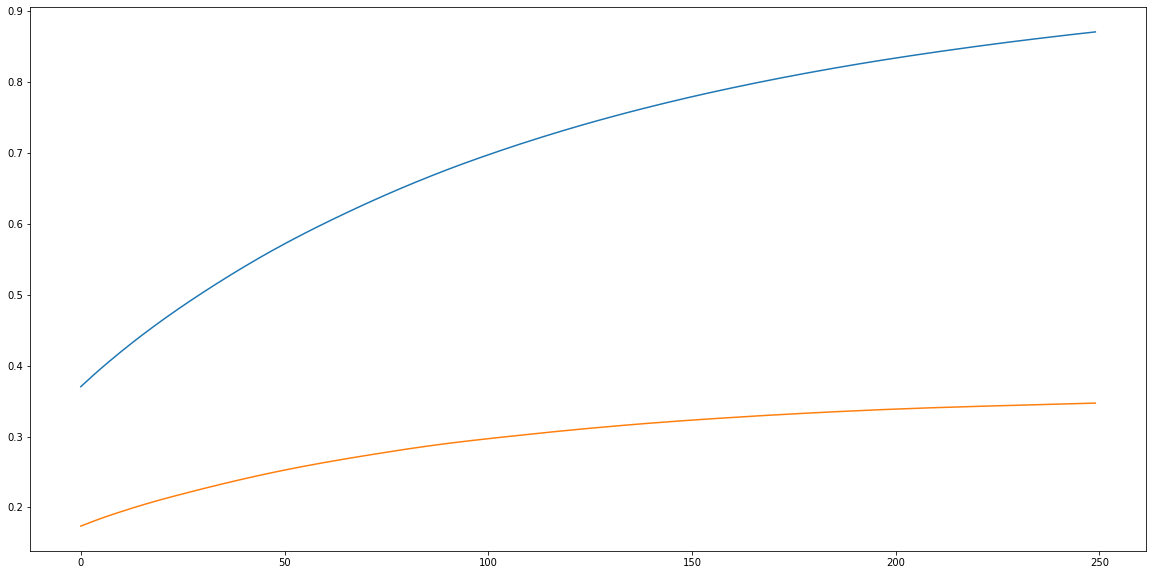

In [30]:
from sklearn.svm import SVR

start = time.time()

# y, 타겟 / X, 트레인 데이터
y = data.iloc[:, 0]
X = data.iloc[:, 1:]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, shuffle=True)
        
C_limit = 300.0
C_one = 50.0

C_li = list()
trainAcc_li = list()
testAcc_li = list()

while C_one < C_limit:
    SVR_reg = SVR(C=C_one)
    SVR_reg.fit(X_train, y_train)
    y_pred = SVR_reg.predict(X_test)
    C_li.append(C_one)
    trainAcc_li.append(SVR_reg.score(X_train, y_train))
    testAcc_li.append(SVR_reg.score(X_test, y_test))
    C_one += 1.0
    
plt.rcParams['figure.figsize'] = [20, 10]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(trainAcc_li)
ax.plot(testAcc_li)

print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간